In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# Новый раздел

In [ ]:
data = pd.read_csv("NetflixShows - NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data.head()

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


Датасет содержит пропущенные данные, содержащие менее 50% от признака, ratinglevel -категориальные и user rating score -  численные данные. Основные причины - неправильный ввод и сокрытие информации и их  можно классифицировать как отсутствующие случайно. Посмотрим на количество пропусков по группам рейтинга.

In [ ]:
mvrL = data['ratingLevel'].isnull().groupby(data['rating']).sum()                  #число потерянных значений "ratingLevel" в зависимости от группы рейтинга
mdrl = data.groupby('rating')['ratingLevel'].agg(lambda x: pd.Series.mode(x)[0])   #часто встречающееся значение  "ratingLevel" в зависимости от группы рейтинга
mvurs = data['user rating score'].isnull().groupby(data['rating']).sum()           #число потерянных значений "user rating score" в зависимости от группы рейтинга
mdurs =  data.groupby('rating')['user rating score'].median()                      #медиана значений "user rating score" в зависимости от группы рейтинга
df = pd.concat([mvrL, mdrl, mvurs, mdurs], axis=1, keys= ['miss_val_rL', 'most_common_rL','miss_val_urs', 'median_urs' ])
df

,miss_val_rL,most_common_rL,miss_val_urs,median_urs
rating,,,,
G,4,General Audiences. Suitable for all ages.,81,80.0
NR,3,This movie has not been rated.,10,97.0
PG,0,Parental guidance suggested. May not be suitab...,51,91.0
PG-13,0,"For some rude and suggestive material, and for...",4,77.0
R,0,"strong violence, sexual content and adult lang...",10,91.0
TV-14,9,Parents strongly cautioned. May be unsuitable ...,46,91.0
TV-G,0,Suitable for all ages.,28,74.0
TV-MA,38,For mature audiences. May not be suitable for...,52,93.0
TV-PG,5,Parental guidance suggested. May not be suitab...,17,92.0


Судя по таблице выше и описанию групп рейтинга с сайта Netflix https://help.netflix.com/en/node/2064/us пропуски категориальных переменных можно заполнить, для заполнения user rating score- данных недостаточно.  

In [ ]:
data.rating.value_counts(dropna=True,normalize=True)[-2:]

NR    0.014
UR    0.001
Name: rating, dtype: float64

Кроме того, отметим, что группы UR, NR- содержат фильмы, не имеющие рейтинга, составляют 1,5% данных, которые также можно рассматривать как пропуски, для заполнения которых возможен дополнительный поиск в интернете. 

In [ ]:
data['ratingLevel'] = data.groupby('rating')['ratingLevel'].apply(lambda x: x.fillna(x.mode().iloc[0])).reset_index(drop=True)
data.info() #Заполнили данные по рейтингу- часто встречающимися значениями, для анализа "user rating score" строки с пропусками удалим чуть позже.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        1000 non-null   object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

Дубликаты- это данные, появившиеся более одного раза в системе. Основные причины возникновения дубликатов
 — повторные представления, неправильное соединение данных из разных источников, ошибки пользователя при занесении информации.
В нашем датасете половина строк это дубликаты, из которых задублированы 244 строки:

In [ ]:
duplicateRows = data[data.duplicated()]
data.duplicated().sum()

500

In [ ]:
duplicateRowsClear = duplicateRows.drop_duplicates(keep="first").reset_index(drop=True)
len(duplicateRowsClear)

244

In [ ]:
df = duplicateRowsClear.groupby(['rating']).size().reset_index(name = 'Total').sort_values(by='Total', ascending=False)
df.head(5)

,rating,Total
5,TV-14,58
2,PG,45
0,G,34
7,TV-MA,32
9,TV-Y,16


В отчете выше выведены топ-5 рейтинговых групп, из выборки дубликатов; для ответа на вопрос обусловленности дублирования в разбираемом датасете полезно посмотреть появление дубликатов по времени возникновения, лидирует группа TV-14

In [ ]:
duplicateRowsClear['release year'].max()-duplicateRowsClear['release year'].min()

77

Размах представленных данных включает 77 лет, для графического отображения введем интервалы:

In [ ]:
spans = pd.cut(duplicateRowsClear['release year'], 10)

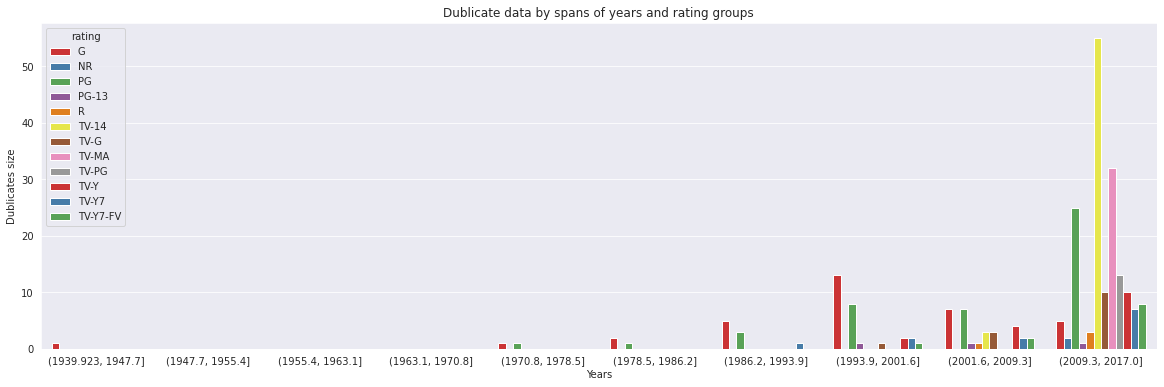

In [ ]:
df = duplicateRowsClear.groupby([spans,'rating']).size().reset_index(name = 'Total')
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')
sns.barplot(data = df,x = 'release year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('Dublicate data by spans of years and rating groups')
plt.xlabel('Years')
plt.ylabel('Dublicates size')
plt.show()

Удалим дубликаты и сравним с общей тенденций групп:

In [ ]:
data = data.drop_duplicates(keep="first").reset_index(drop=True) 

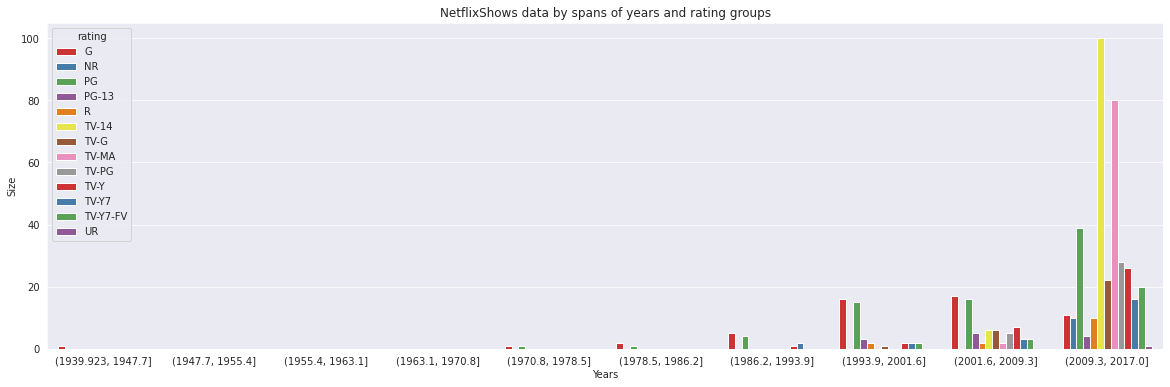

In [ ]:
spans1 = pd.cut(data['release year'], 10)
df1 = data.groupby([spans1,'rating']).size().reset_index(name = 'Total')
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')
sns.barplot(data = df1,x = 'release year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('NetflixShows data by spans of years and rating groups')
plt.xlabel('Years')
plt.ylabel('Size')
plt.show()

Очевидно, что число дублированных данных увеличилось в последнем периоде, и динамика по времени совпадает с общей тенденцией характеризующейся увеличением объема обрабатываемых данных и активности пользователей сети.  Что касается изменения доли групп в дубликатов по периодам, то они также напрямую связаны со спросом и увеличением производства фильмов  "For mature audiences", как и в общей выборке. "Всевозрастные" картины на протяжении всего периода, сохраняющие первество , потеряли его в последнем периоде,  но сохранили плавную тенденцию к росту, коррелилирующую с ростом всего объема производства тв- и кинофильмов.

### Сколько рейтинговых групп представлено в данных?

In [ ]:
print('В датасете представлено ',data['rating'].nunique(),'рейтинговых групп, а именно: ',data['rating'].unique())

В датасете представлено  13 рейтинговых групп, а именно:  ['PG-13' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-Y' 'NR' 'TV-Y7-FV' 'UR' 'PG'
 'TV-G' 'G' 'TV-Y7']


Ответ 13, однако если принять во внимание, что группы NR, UR - фильмы, которые не имеют рейтинга, то можно говорить об 11 известных рейтинговых групп. 

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

In [ ]:
data['user rating score'].mode() # Посмотрим моду -  число, наиболее часто встречающееся в данном наборе оценок. 

0    96.0
1    97.0
2    98.0
dtype: float64

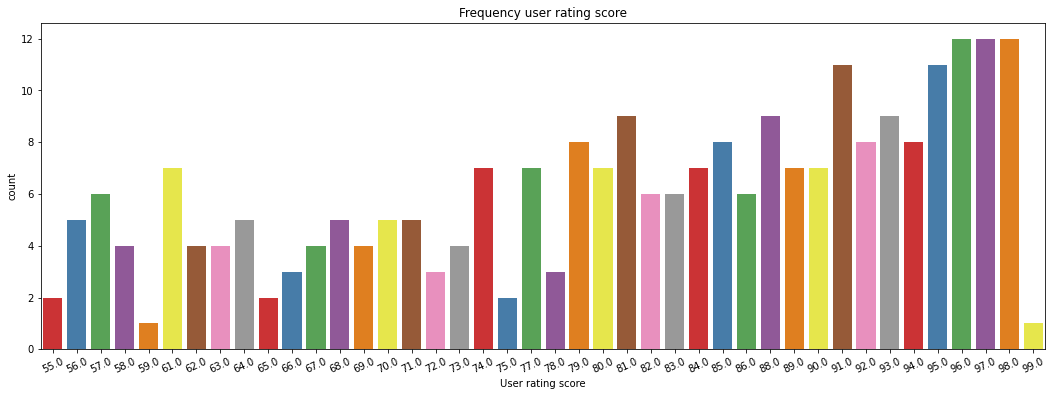

In [ ]:
df2 = data.groupby("user rating score")['title'].count().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(x='user rating score',y='title', data=df2, palette = 'Set1')
plt.xticks(rotation=25)
plt.title('Frequency user rating score')
plt.xlabel('User rating score')
plt.ylabel('count')
plt.show()

Из графика видно, что оценки с 91 по 98 встречаются наиболее часто. 96, 97,98 - оценки одинаково максимально часто встречающиеся в датасете.

Почему высокие оценки встречаются чаще? У ТВшоу и кино часто складывается разная аудитория, что обуславливает и разный подход пользователей к  оценке. К примеру, многими замечено, что сериалы, в целом , имеют больший ретинг, чем кино. У сериалов больший хронометраж и соответственно больший уровень благосклонности к недочетам, к примеру, если пользователям "очень понравилось" только несколько серий, из всего сериала, "плохие"серии уже не снизят рейтинг.  Зритель "привыкает" к шоу и оно часто переходит в разряд уже обязательных потребностей).
Кроме того, качество продукции начинает расти вслед за популярностью, так как кинокомпании вкладываются, приглашают более рейтинговых режиссеров, сценаристов и тд.


### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

Посмотрим на статистику оценок пользователей, имеющиеся данные ( а это практически 50% от всего датасета) показывают нам достаточно высокий уровень оценок.  Среднее - 81,4 незначительно, но все же отличается от медианы 83,5. На различие влияет наличие "выбросов". Медиана — это значение признака, справа и слева от которого находится равное число наблюдений (по 50%),  и в  отличие от среднего значения медиана более устойчива к "выбросам"

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
print('В датасете представлены данные за ',data['release year'].nunique(),' лет, а именно: ',\
    np.sort(data['release year'].unique()))

В датасете представлены данные за  35  лет, а именно:  [1940 1976 1978 1982 1986 1987 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017]


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

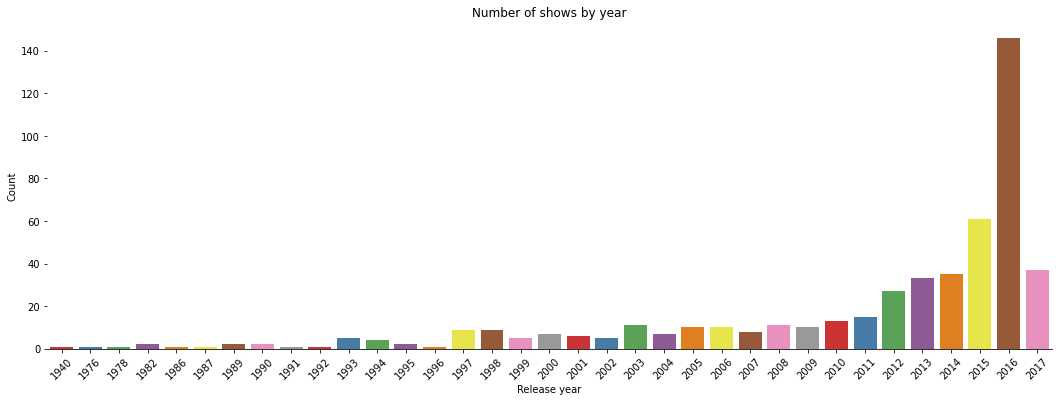

In [ ]:
df3 = data.groupby("release year")['title'].count().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(x='release year', y ='title', data=df3, order=df3['release year'], palette='Set1')
sns.despine(left=True)
plt.xticks(rotation=45)
plt.title('Number of shows by year')
plt.xlabel('Release year')
plt.ylabel('Count')
plt.show()

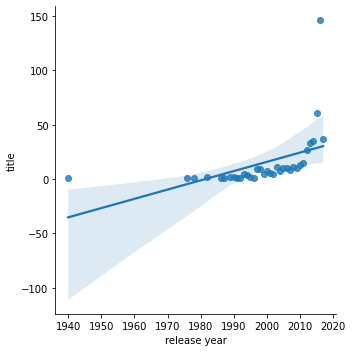

In [ ]:
sns.lmplot(x='release year', y="title", data=df3, palette='Set1')
plt.show()

Можно говорить о сохраняющейся тенденции к росту, 2017 год явился естественным откатом после рывка 2016 года. Кроме того, заметны пропущенные данные в период с 1940 по 1976 года, данные за 1940 являются выбросами, как показывают графики выше и более очевидно боксплот:

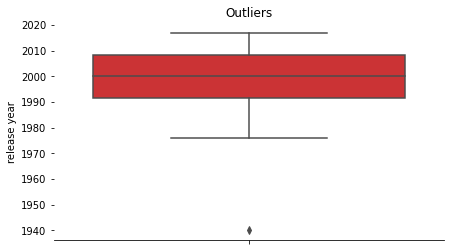

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(y='release year',data=df3, palette='Set1')
sns.despine(left=True)
plt.title('Outliers')
plt.show()

Выбросами называются экстремальные значения во входных данных, которые находятся далеко за пределами других наблюдений. Они могут приводить к ошибочным представлениям на входе и в дальнейшем к ошибочной интерпретации собранных данных. Причинами выбросов могут быть ошибки измерений,  необычная "природа" входных данных,  а также выбросы могут быть частью распределений. В нашем случае, если ориентироваться на информацию https://ru.wikipedia.org/wiki/Netflix , что Netflix была образована в 1997 году, данные более раннего периода - либо ошибочны, либо включают кинопродукцию, распространяемую компанией.
Собственное кинопроизводство Netflix начал в 2011, отметив эту особенность, продолжим анализ имеющегося датасета.

Очистим от выбросов наш датасет:

In [ ]:
first_quartile = data['release year'].describe()['25%']
third_quartile = data['release year'].describe()['75%']
iqr = third_quartile - first_quartile
condition = (data['release year'] > (first_quartile - 3 * iqr)) & (data['release year'] < (third_quartile + 3 * iqr))
data1 = data[condition]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              493 non-null    object 
 1   rating             493 non-null    object 
 2   ratingLevel        493 non-null    object 
 3   release year       493 non-null    int64  
 4   user rating score  251 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.1+ KB


### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



    release year  user rating score
25          2016                 84
26          2017                 88


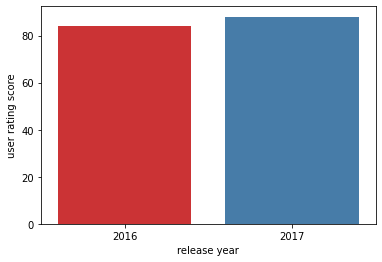

In [ ]:
df4 = data1[data1['user rating score']>0].dropna() # по всем рейтинговым группам, убрав пустые данные.
df4 = df4.groupby('release year')['user rating score'].mean().astype(int).reset_index().iloc[-2:]
print(df4)
sns.barplot(y='user rating score',x='release year', data=df4, palette = 'Set1')
plt.show()

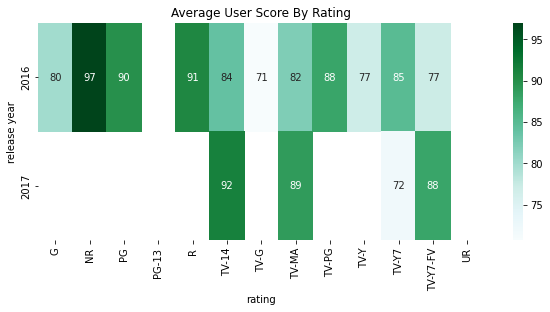

In [ ]:
plt.subplots(figsize=(10,4))   #или рассматривая по всем рейтинговым группам, учитывая наличие пустот.
ratings=data1.groupby('rating')['rating'].count()
ratings.sort_values(ascending=True,inplace=True)
mean_shows=data1[data1['rating'].isin(ratings.index)]
piv=mean_shows.groupby(['release year','rating'])['user rating score'].mean().reset_index()
piv=piv.pivot('release year','rating','user rating score').iloc[-2:]
sns.heatmap(piv,annot=True,cmap='BuGn')
plt.title('Average User Score By Rating')
plt.show()

Да, в 2017 году рейтинг шоу был выше, а объем выпущенной кинопродукции ниже. Исходя из этого, можно говорить о 2017 г как  о финансово более успешном, по сравнению с 2016 г. (по норме рентабельности), так и по оценкам пользователей. Однако по абсолютной прибыли, больший объем валового дохода принес 2016г, несмотря на меньший рейтинг.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
import plotly.express as px
df5=data1.groupby(['rating']).size().reset_index(name='counts')
piechart=px.pie(df5,values='counts',names='rating',title='Number of appearances in dataset')
piechart.show()

В данном случае пай-чарт является более интерпретируемым  относительно  бар чарта. Чуть улучшить восприятие можно, если вынести легенду,показывающую рейтинги в порядке убывания оценок, в топе 3 находятся: TV-14, TV-MA, PG

In [ ]:
df6 = data1.groupby(['release year','rating']).size().reset_index().rename(columns={0: 'count'})
fig = px.treemap(df6, values='count', path=['release year','rating'], color='rating')
fig.update_traces(textinfo="label+percent parent")
fig.show()

А с помощью тримэп легко увидеть иерархию рейтингов в разрезе лет.

In [ ]:
# !pip uninstall -y pandas-profiling 
# !pip3 install pandas-profiling==3.1.0 

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data1, title='Pandas Profiling Report')
profile.to_notebook_iframe()
#В заключении обзор получившегося датасета с помощью pandas profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
data_ = pd.read_csv('NetflixShows - NetflixShows.csv', encoding='cp437')
del data_['ratingDescription'], data_['user rating size']
dshow = data_.copy()
cond = ['PG-13', 'R', 'TV-14' ,'TV-PG' ,'TV-MA', 'TV-Y', 'NR', 'TV-Y7-FV', 'UR', 'PG','TV-Y7']
dshow.loc[(dshow.rating. isin(cond)), 'rating'] = 'other'
size = dshow.groupby('rating').size().reset_index(name = 'Qty')
size  

,rating,Qty
0,G,138
1,TV-G,52
2,other,810


Для анализа выберем шоу с рейтингом G - для всех возрастов, в разрезе кинофильмов и ТВ-шоу, составляющие приблизительно 20% от общего числа всех шоу датасета. По графикам заметно, что Netflix "начинался" с шоу для всех возрастов, как семейное развлекательное кино.

Text(0.5, 1.0, 'Type of Show by choice')

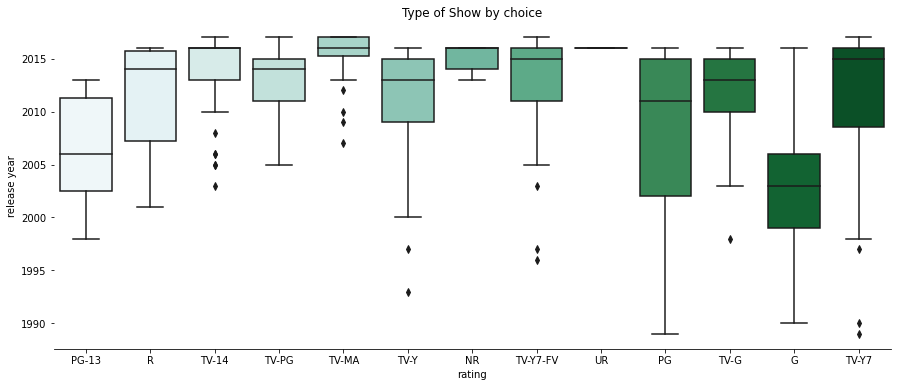

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y='release year', x='rating', data=data1, palette='BuGn')
sns.despine(left=True)
plt.title('Type of Show by choice')

Так же уберем выбросы и выберем рейтинги G & TV-G.

Text(0.5, 1.0, 'Type of Show by choice')

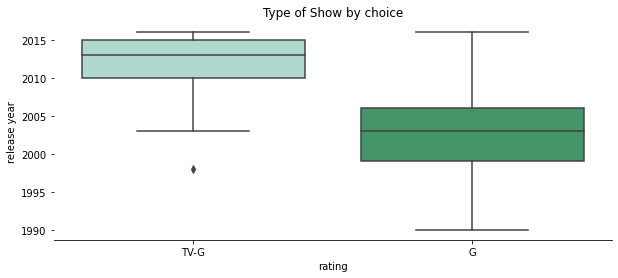

In [ ]:
df7 = data1.loc[data1['rating'].isin(['G','TV-G'])]
plt.figure(figsize=(10,4))
sns.boxplot(y='release year', x='rating', data=df7, palette='BuGn')
sns.despine(left=True)
plt.title('Type of Show by choice')

С годами акцент семейного фильма сместился в ТВ-формат.

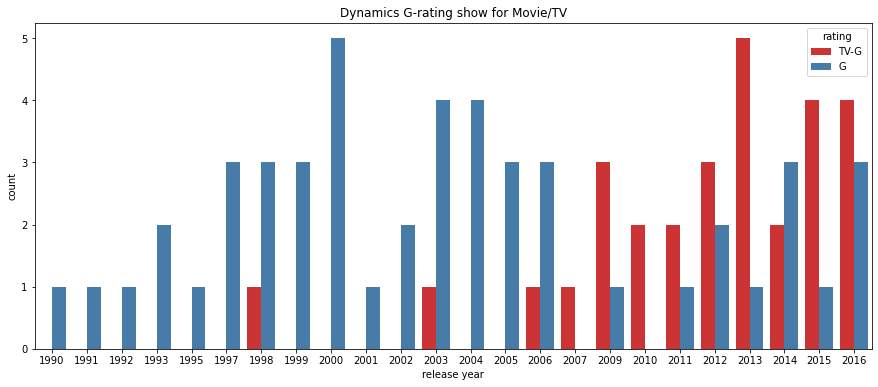

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(x='release year', data=df7, hue='rating',palette='Set1')
plt.title('Dynamics G-rating show for Movie/TV')
plt.show()

Начиная с 2006 года шоу ТВ-формата уже производятся ежегодно, а с 2009 года ТВ-шоу "G" рейтинга уверенно лидируют над производством кинопродукции. 

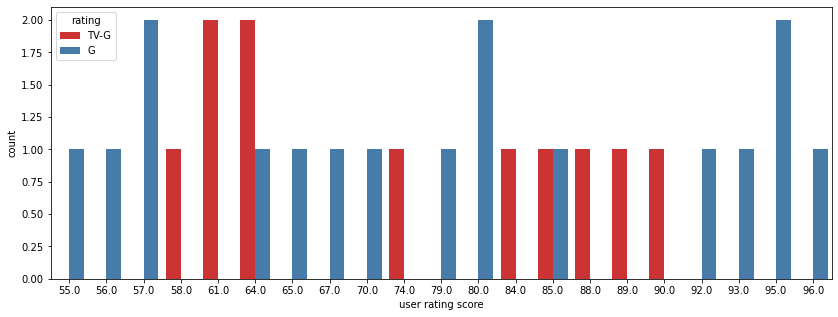

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
ax = sns.countplot(x='user rating score',data=df7, hue='rating',palette='Set1')
plt.show()

Диапазон оценок пользователей очень широк , но все же кинофильмы чаще "показывают" более высокий рейтинг у зрителей. 

In [ ]:
df7[df7['rating'] == 'G']['user rating score'].describe()

count    17.000000
mean     75.647059
std      15.272284
min      55.000000
25%      64.000000
50%      79.000000
75%      92.000000
max      96.000000
Name: user rating score, dtype: float64

In [ ]:
print('В датасете, содержащим шоу рейтинга G & TV-G представлены данные за ',df7['release year'].nunique(),' лет, а именно: ',\
    np.sort(df7['release year'].unique()))

В датасете, содержащим шоу рейтинга G & TV-G представлены данные за  24  лет, а именно:  [1990 1991 1992 1993 1995 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2009 2010 2011 2012 2013 2014 2015 2016]


Удалив пропуски по рейтинговым оценкам, проанализируем средние показатели за 2 последних представленных в датасете года по выбранной группе.

    release year  user rating score
16          2015                 86
17          2016                 73


<ipython-input-15-dc2b7ccbb14b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df7_score = df7[data1['user rating score']>0].dropna()


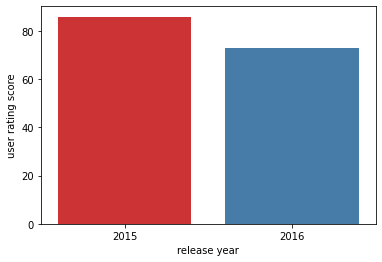

In [ ]:
df7_score = df7[data1['user rating score']>0].dropna()
df7_score = df7_score.groupby('release year')['user rating score'].mean().astype(int).reset_index().iloc[-2:]
print(df7_score)
sns.barplot(y='user rating score',x='release year', data=df7_score, palette = 'Set1')
plt.show()

Но все же, "мирное" семейное кино продолжает сдавать свои позиции и, несмотря на рост производства кинопродукции в 2016г, средняя оценка, по сравнению с 2015 г, упала на 13 пунктов. На следующих графиках видно, что при общем росте производства Netflix, выпуск кинокартин рейтинга G - для всех возрастов - падает.

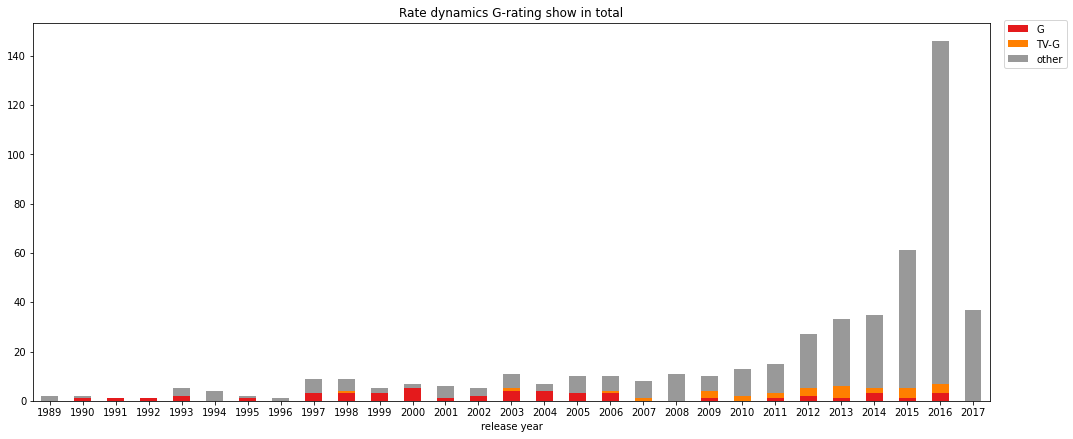

In [ ]:
cond = ['PG-13', 'R', 'TV-14' ,'TV-PG' ,'TV-MA', 'TV-Y', 'NR', 'TV-Y7-FV', 'UR', 'PG','TV-Y7']
ds = data1.copy()
ds.loc[(ds.rating. isin (cond)), 'rating'] = 'other'
dspiv=pd.pivot_table(ds, index=['release year'], columns=['rating'], values = 'title', aggfunc = 'count', fill_value=0)
ax = dspiv.plot.bar(stacked=True, rot=0, cmap='Set1', figsize=(15, 6))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.tight_layout()
plt.title('Rate dynamics G-rating show in total')
plt.show()

С разделением на ТВ и кино и ниже- без разделения: G плюс TV-G относительно всех шоу.

In [ ]:
ds1 = ds.copy()
ds1.loc[(ds.rating. isin (['G','TV-G'])), 'rating'] = 'general'
df8 = ds1.groupby(['release year','rating']).size().reset_index().rename(columns={0: 'count'})
fig = px.treemap(df8, values='count', path=['release year','rating'], color='rating', title='Rate dynamics (G+TV-G)-rating shows in total')
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [ ]:
df7.sort_values(by=['user rating score'], ascending=False).head(10)

,title,rating,ratingLevel,release year,user rating score
396,Homeward Bound: The Incredible Journey,G,General Audiences. Suitable for all ages.,1993,96.0
346,Tarzan,G,General Audiences. Suitable for all ages.,1999,95.0
347,The Emperor's New Groove,G,General Audiences. Suitable for all ages.,2000,95.0
397,Anastasia,G,General Audiences. Suitable for all ages.,1997,93.0
267,Chicken Little,G,General Audiences. Suitable for all ages.,2005,92.0
188,Fuller House,TV-G,Suitable for all ages.,2016,90.0
277,Phineas and Ferb,TV-G,Suitable for all ages.,2012,89.0
356,Jessie,TV-G,Suitable for all ages.,2015,88.0
380,Mulan 2,G,General Audiences. Suitable for all ages.,2004,85.0
388,Barbie Life in the Dreamhouse,TV-G,Suitable for all ages.,2012,85.0


Рассмотрев топ-10 видим, что максимальное оценку шоу формата G получил кинофильм "Homeward Bound: The Incredible Journey" в 1993 году, то есть, практически 30 лет назад. 

А если подробнее посмотреть на 1993 год, отметим, что большинство представленных фильмов не имеют рейтинга. 

In [ ]:
pd.pivot_table(data1, index=['release year'], columns=['title','rating'], values = 'user rating score', aggfunc = 'mean', \
              fill_value=0).loc[1993].sort_values(ascending=False).head(10)

title                                   rating  
Homeward Bound: The Incredible Journey  G           96
The Nightmare Before Christmas          PG          84
Cool Runnings                           PG          81
10 Things I Hate About You              PG-13        0
Pok├î┬⌐mon: Indigo League               TV-Y         0
Pok├î┬⌐mon: XY                          TV-Y7-FV     0
Portlandia                              TV-14        0
Pretty Little Liars                     TV-14        0
Prison Break                            TV-14        0
Private Practice                        TV-14        0
Name: 1993, dtype: int64

Сделаем окончательный вывод, что лучшие годы для шоу рейтинга G "для всех возрастов" по кинопродукции, представленной в датасете,  остались позади, яркий и самый  удачный представитель этой группы был выпущен в 1993 году. 